<h2> Data Analysis Project-2 Solution</h2>

<h4>Import Library</h4>

In [57]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf

<h4>Read Data set or CSV file</h4>

In [4]:
# Read the data from the CSV file
data = pd.read_csv("project 2 data.csv")

<h4>Data Cleaning</h4>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      145 non-null    object
 1   Item      145 non-null    object
 2   Amount    145 non-null    int64 
 3   Category  144 non-null    object
 4   Time      145 non-null    object
 5   day       145 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.9+ KB


In [6]:
data.isnull().any()
data.isnull().any().sum()

1

In [7]:
data.dropna(inplace=True)

In [8]:
data.head()

,Date,Item,Amount,Category,Time,day
0,1/3/2023,chai,7,alone,7:00,Wednesday
1,1/3/2023,chai,20,friend,10:00,Wednesday
2,1/3/2023,juice,15,friend,13:00,Wednesday
3,1/3/2023,rikshow,12,alone,14:00,Wednesday
4,1/3/2023,coffee,12,alone,15:00,Wednesday


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      144 non-null    object
 1   Item      144 non-null    object
 2   Amount    144 non-null    int64 
 3   Category  144 non-null    object
 4   Time      144 non-null    object
 5   day       144 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.9+ KB


In [10]:
data.isnull().any()

Date        False
Item        False
Amount      False
Category    False
Time        False
day         False
dtype: bool

<h2>Analytical Question-1: Total Expenditure:  What is the total expenditure over  the given period? </h2>

In [11]:
total_expenditure = data["Amount"].sum()
print(f"Total Expenditure: ${total_expenditure:.2f}")

Total Expenditure: $4599.00


<h3>Analytical Question-2: Expenditure by Category:  What is the total expenditure  for each category? </h3>

In [12]:
expenditure_by_category = data.groupby("Category")["Amount"].sum()
print("\nExpenditure by Category:")
print(expenditure_by_category)


Expenditure by Category:
Category
alone     2710
friend    1889
Name: Amount, dtype: int64


<h3>Analytical Question-3: Average Daily Expenditure:  What is the average expenditure  per day? </h3>

In [13]:
num_days = data["Date"].nunique()
average_daily_expenditure = total_expenditure / num_days
print(f"\nAverage Daily Expenditure: ${average_daily_expenditure:.2f}")


Average Daily Expenditure: $148.35


<h3>Analytical Question-4:Top Spending Items:  What are the top 5 items by total  expenditure? </h3>

In [58]:
top_items = data.groupby("Item")["Amount"].sum().nlargest(5)
print("\nTop 5 Spending Items:")
print(top_items)


Top 5 Spending Items:
Item
chai with snaks    1080
biryani             580
shoe                500
wifi                350
others              335
Name: Amount, dtype: int64


<h3>Analytical Question-5: Expenditure by Day:  How does expenditure vary by day  of the week? </h3>

In [15]:
expenditure_by_day = data.groupby("day")["Amount"].sum()
print("\nExpenditure by Day:")
print(expenditure_by_day)


Expenditure by Day:
day
Friday        356
Monday        670
Saturday      402
Sunday       1267
Thursday      493
Tuesday       691
Wednesday     720
Name: Amount, dtype: int64


<h4>Import Library</h4>

In [17]:
import datetime as dt

In [38]:
from io import StringIO
from datetime import datetime

<h3>Analytical Question-7: Expenditure by Social Context:  How does spending differ  when alone versus with a 
friend?</h3>

In [23]:
expenditure_by_social_context = data.groupby("Category")["Amount"].sum()
print("\nExpenditure by Social Context:")
print(expenditure_by_social_context)


Expenditure by Social Context:
Category
alone     2710
friend    1889
Name: Amount, dtype: int64


<h3>Analytical Question-8: Item Frequency:  Which items are purchased most frequently? </h3>

In [24]:
item_frequency = data["Item"].value_counts()
print("\nItem Frequency:")
print(item_frequency)


Item Frequency:
Item
chai with snaks    48
chai               21
others             16
coldrink           11
coffee             10
juice               9
rikshow             4
biryani             4
idli                3
samosa              3
chicken             3
ice cream           2
wifi                1
freanky             1
petrol              1
recharge            1
shoe                1
pizza               1
chass               1
faluda              1
choclate            1
chiness bhel        1
maggi               1
Name: count, dtype: int64


<h3>Analytical Question-10: Category vs. Time:  How does spending in different  categories vary by time of day?</h3>

In [30]:
data_cleaned = data.dropna(subset=["Category"])

category_vs_time = data_cleaned.groupby(["Category"])["Amount"].sum()
print("\nCategory vs. Time:")
print(category_vs_time)



Category vs. Time:
Category
alone     2710
friend    1889
Name: Amount, dtype: int64


<h1>Visualization Part using Matplotlib</h1>

<h2>Visualization Question-1: Expenditure Over Time:  Create a line chart showing  total daily expenditure. </h2>

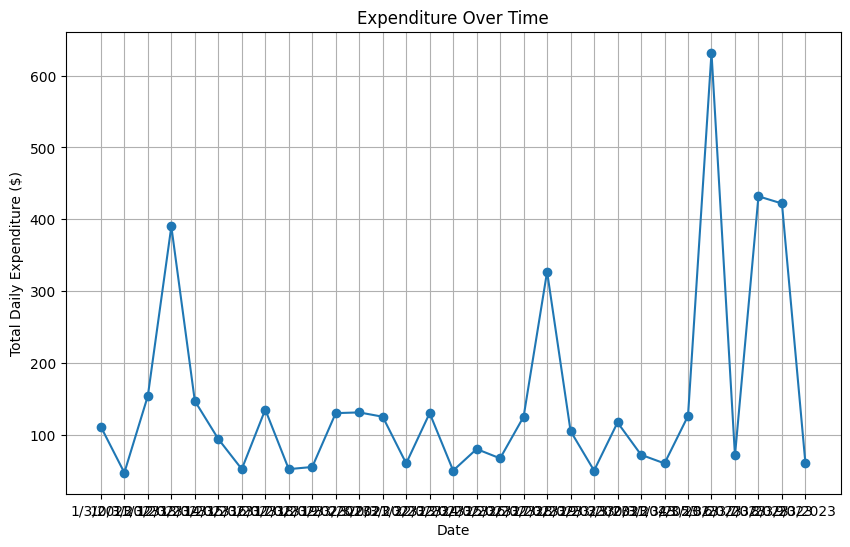

In [44]:
daily_expenditure = data.groupby("Date")["Amount"].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_expenditure.index, daily_expenditure.values, marker="o")
plt.xlabel("Date")
plt.ylabel("Total Daily Expenditure ($)")
plt.title("Expenditure Over Time")
plt.grid(True)
plt.show()


<h3>Visualization Question-2: Expenditure by Category:  Create a bar chart showing  expenditure across different 
categories.</h3>

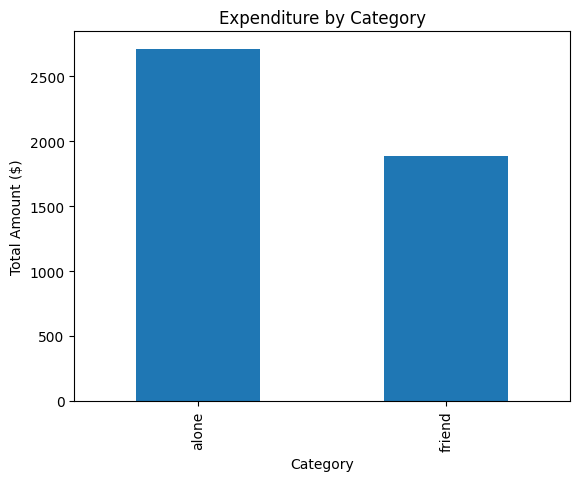

In [45]:
expenditure_by_category = data.groupby("Category")["Amount"].sum()
expenditure_by_category.plot(kind="bar", xlabel="Category", ylabel="Total Amount ($)", title="Expenditure by Category")
plt.show()

<h3>Visualization Question-3:3.  Top Spending Items:  Create a bar chart for the top  5 items by total expenditure. 
</h3>

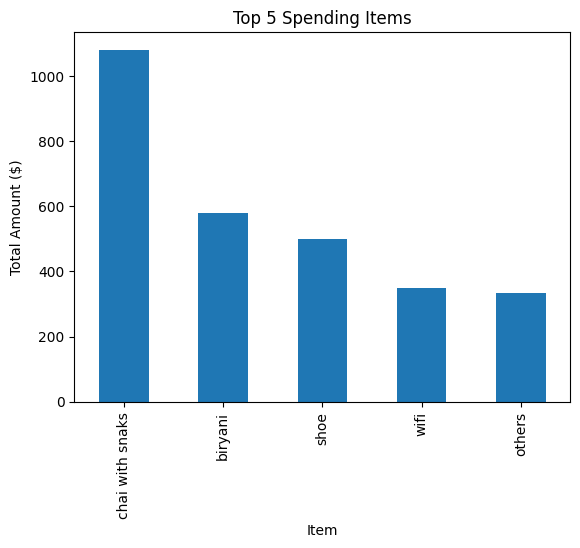

In [46]:
top_items = data.groupby("Item")["Amount"].sum().nlargest(5)
top_items.plot(kind="bar", xlabel="Item", ylabel="Total Amount ($)", title="Top 5 Spending Items")
plt.show()

<h3>Visualization Question-4: Expenditure by Day of the Week:  Create a bar chart  showing average expenditure for 
each day of the week. </h3>

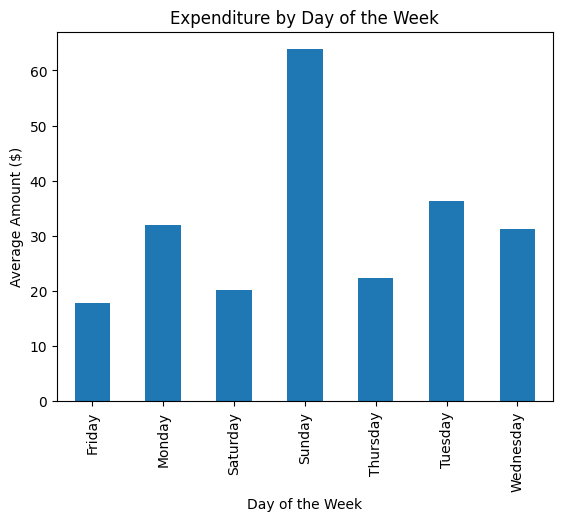

In [47]:
average_expenditure_by_day = data.groupby("day")["Amount"].mean()
average_expenditure_by_day.plot(kind="bar", xlabel="Day of the Week", ylabel="Average Amount ($)", title="Expenditure by Day of the Week")
plt.show()

<h3>Visualization Question-6: Category Breakdown:  Create a pie chart showing the  proportion of total expenditure for 
each category.</h3>

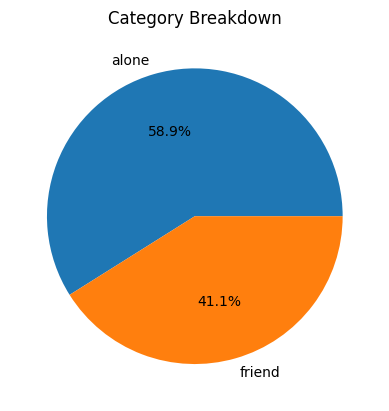

In [49]:
category_proportion = expenditure_by_category / expenditure_by_category.sum()
category_proportion.plot(kind="pie", autopct="%1.1f%%", title="Category Breakdown")
plt.ylabel("")
plt.show()

<h3>Visualization Question-7: Expenditure Distribution:  Create a histogram showing  the distribution of transaction 
amounts. </h3>

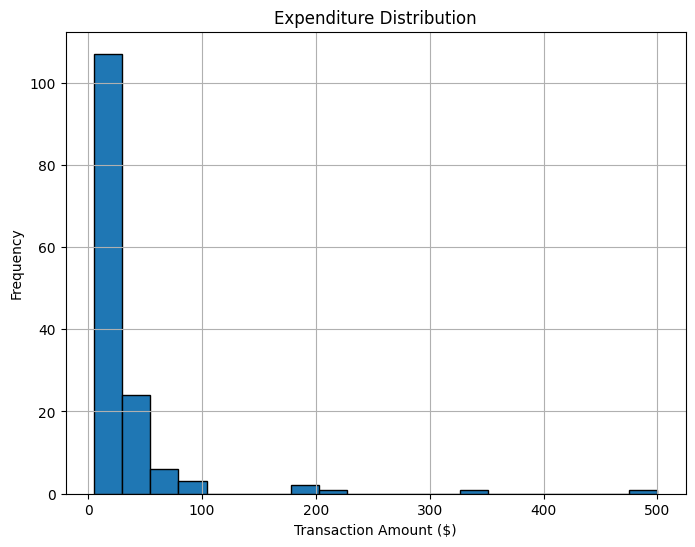

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(data["Amount"], bins=20, edgecolor="black")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.title("Expenditure Distribution")
plt.grid(True)
plt.show()

<h3>Visualization Question-8:  Expenditure by Social Context:  Create a bar chart  comparing expenditure when alone 
versus with a friend. </h3>

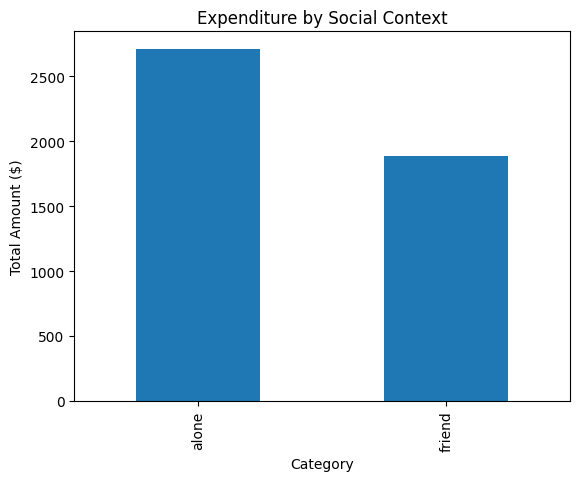

In [51]:
expenditure_by_social_context = data.groupby("Category")["Amount"].sum()
expenditure_by_social_context.plot(kind="bar", xlabel="Category", ylabel="Total Amount ($)", title="Expenditure by Social Context")
plt.show()

<h3>Visualization Question-9:  Item Purchase Frequency:  Create a bar chart showing the frequency of each item 
purchased. </h3>

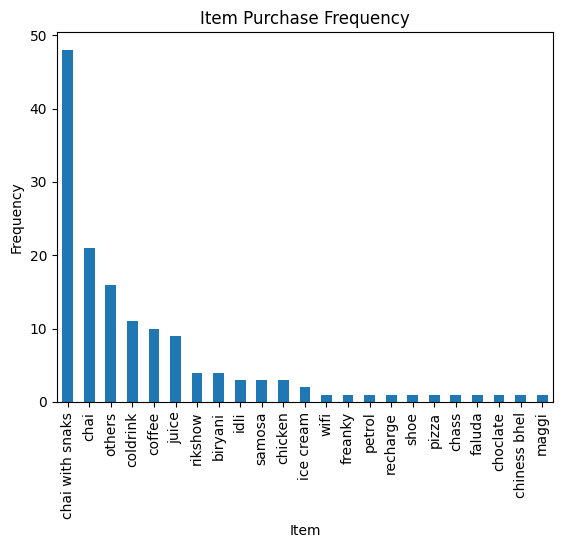

In [59]:
item_frequency = data["Item"].value_counts()
item_frequency.plot(kind="bar", xlabel="Item", ylabel="Frequency", title="Item Purchase Frequency")
plt.show()

<h3>Visualization Question-11: Correlation Matrix </h3>

In [60]:
numeric_columns = data.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_columns.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
        Amount
Amount     1.0
